## <center><b>LUNG CANCER PREDICTION</b><center>

In [324]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle as pkl
warnings.filterwarnings("ignore")

In [227]:
df = pd.read_csv('D:\ML\LUNG CANCER PREDICTION\Dataset\survey lung cancer.csv')

## **DATA DESCRIPTION**

In [228]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


In [229]:
# In this dataset YES = 2, NO = 1
df.shape

(309, 16)

In [230]:
# Check Duplicate Records
df.duplicated().sum()

33

In [231]:
# Remove Duplicate Records
df = df.drop_duplicates()

In [232]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [234]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **ENCODING OF CATEGORICAL FEATURES**

In [235]:
# We need to convert GENDER & LUNG CANCER Column to Numerical values

In [236]:
# Fetch the columns for Label Encoding
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [237]:
# Performing LabelEncoding
# Aim to convert 1 to 0 and 2 to 1 for each df.column
labelEncoder = LabelEncoder()
for i in df.columns:
    df[i] = labelEncoder.fit_transform(df[i])

In [238]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,16,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,16,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,12,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,4,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [239]:
# MALE = 1, FEMALE = 0
# YES = 1, NO = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int32


In [240]:

# In Seaborn, a popular data visualization library in Python, the countplot function is used to show the counts of observations in each categorical bin using bars. Essentially, it's a bar plot where the x-axis represents different categories and the y-axis represents the count of observations in each category.

## **OUTPUT FEATURE ANALYSIS**

Text(0.5, 1.0, 'Target Distribution')

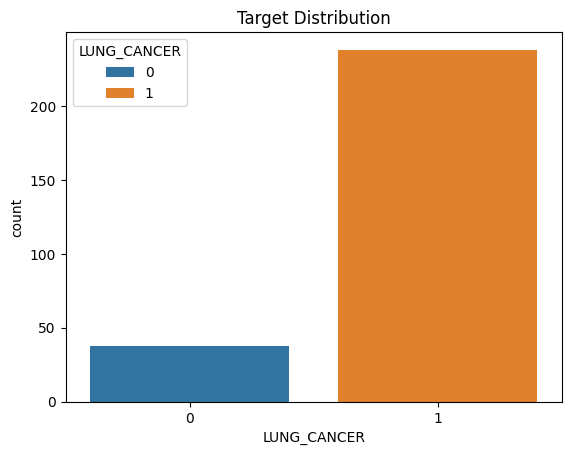

In [241]:
# Let's check the distributaion of Target variable
sns.countplot(x='LUNG_CANCER',data=df,hue='LUNG_CANCER')
plt.title('Target Distribution')

In [242]:
# That is Target Distribution is imbalanced

In [243]:
# Let's do Data Visualization for better understanding of distribution of independent features to the target variable

## **VISUALIZATION & ANALYSIS OF INDEPENDENT FEATURES WITH TARGET**

In [244]:
def plot(col,df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar',figsize=(8,5))

>**GENDER**

<Axes: xlabel='GENDER'>

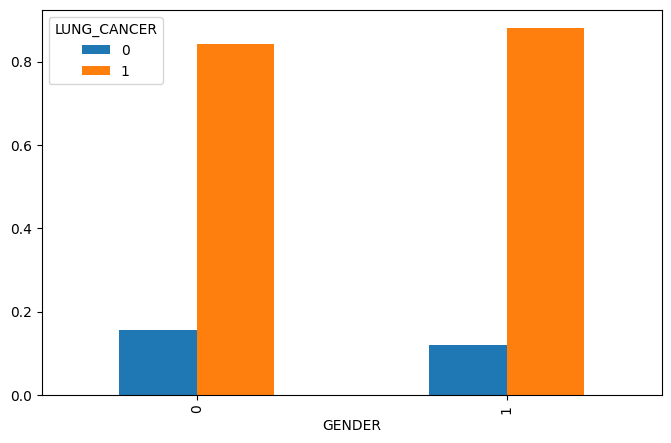

In [245]:
plot('GENDER')

>**AGE**

<Axes: xlabel='AGE'>

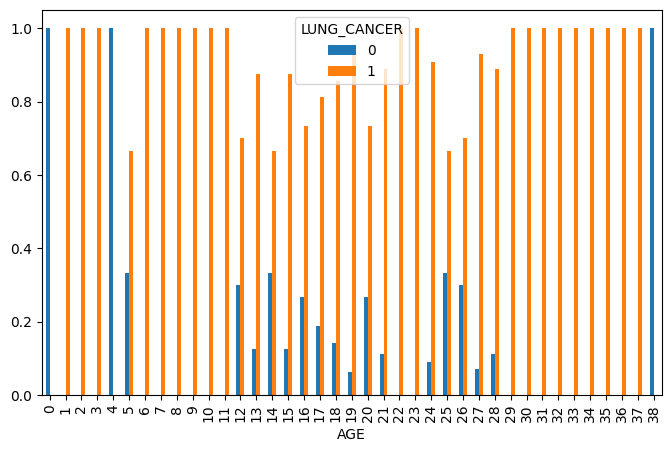

In [246]:
plot('AGE')

>**SMOKING**

<Axes: xlabel='SMOKING'>

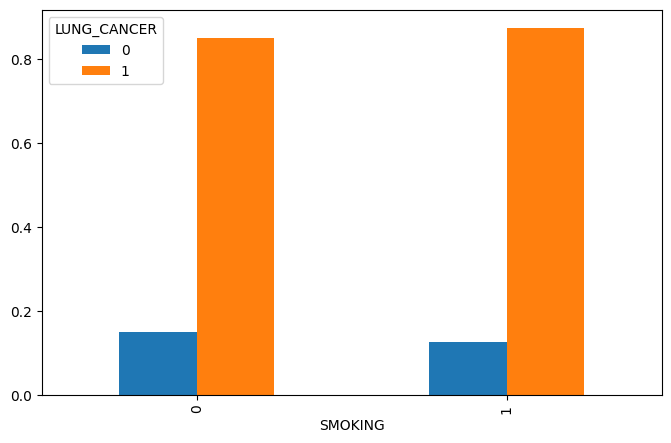

In [247]:
plot('SMOKING')

>**YELLOW FINGERS**

<Axes: xlabel='YELLOW_FINGERS'>

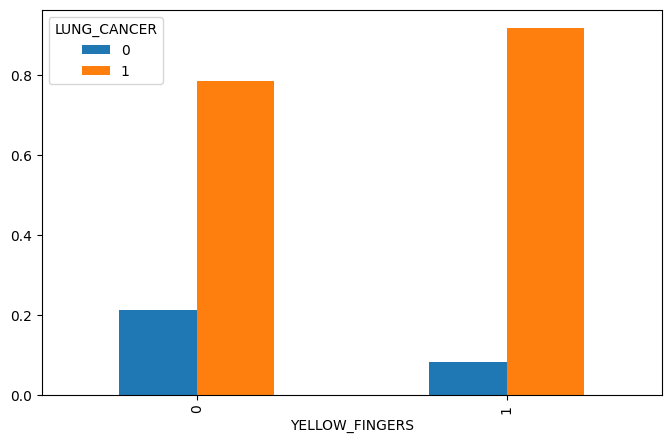

In [248]:
plot('YELLOW_FINGERS')

>**ANXIETY**

<Axes: xlabel='ANXIETY'>

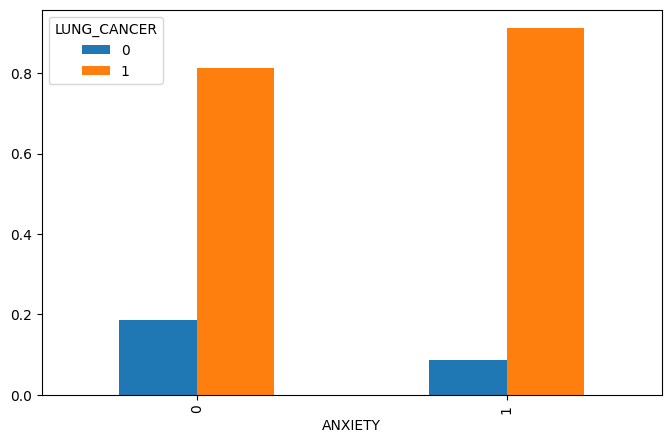

In [249]:
plot('ANXIETY')

>**PEER PRESSURRE**

<Axes: xlabel='PEER_PRESSURE'>

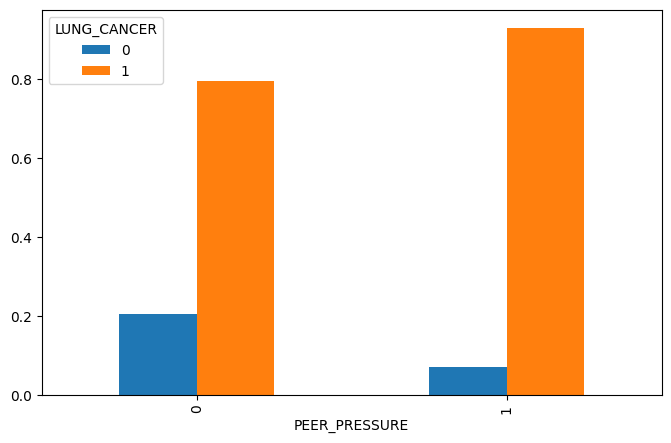

In [250]:
plot('PEER_PRESSURE')

>**CHRONIC DISEASE**

<Axes: xlabel='CHRONIC DISEASE'>

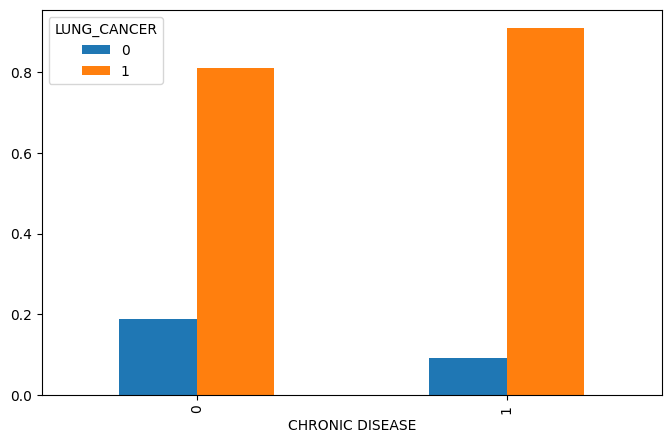

In [251]:
plot('CHRONIC DISEASE')

>**FATIGUE**

<Axes: xlabel='FATIGUE '>

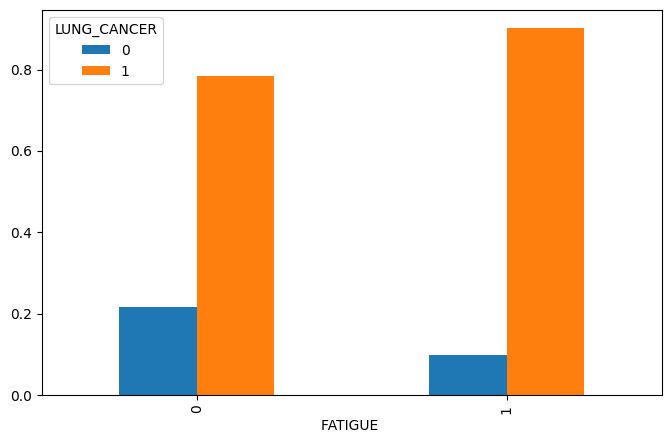

In [252]:
plot('FATIGUE ')

>**ALLERGY**

<Axes: xlabel='ALLERGY '>

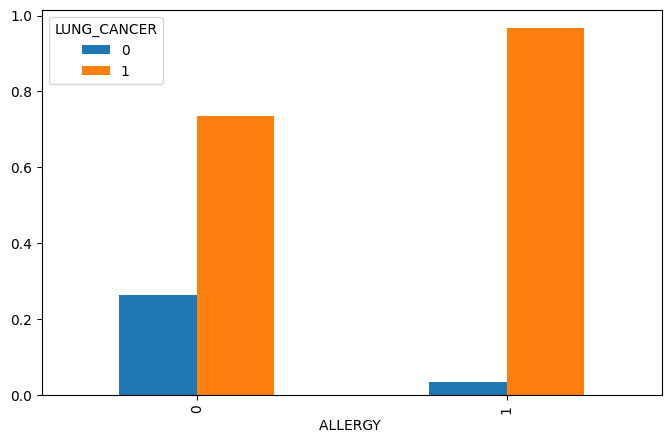

In [253]:
plot('ALLERGY ')

>**WHEEZING**

<Axes: xlabel='WHEEZING'>

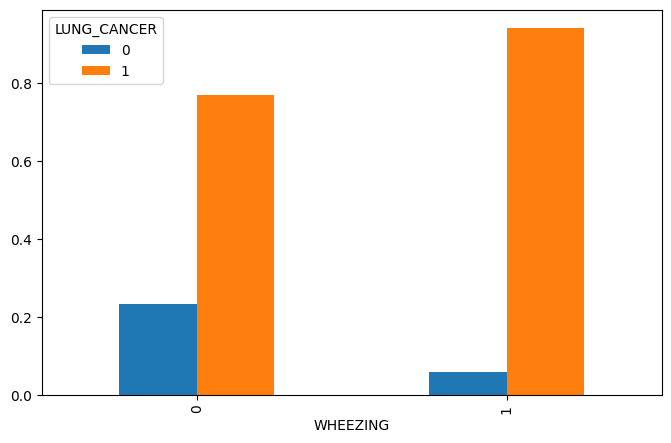

In [254]:
plot('WHEEZING')

>**ALCOHOL CONSUMPTION**

<Axes: xlabel='ALCOHOL CONSUMING'>

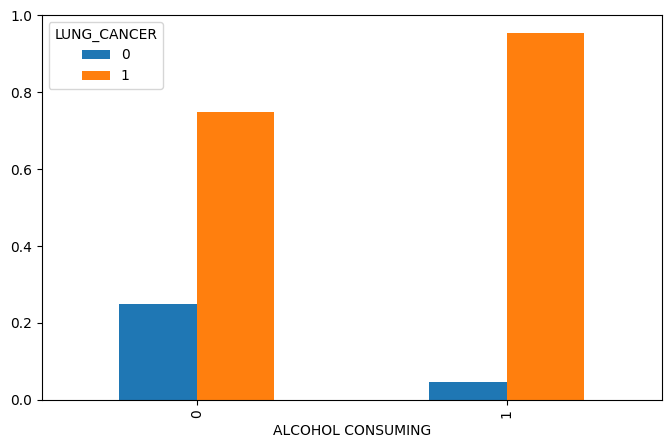

In [255]:
plot('ALCOHOL CONSUMING')


>**COUGHING**

<Axes: xlabel='COUGHING'>

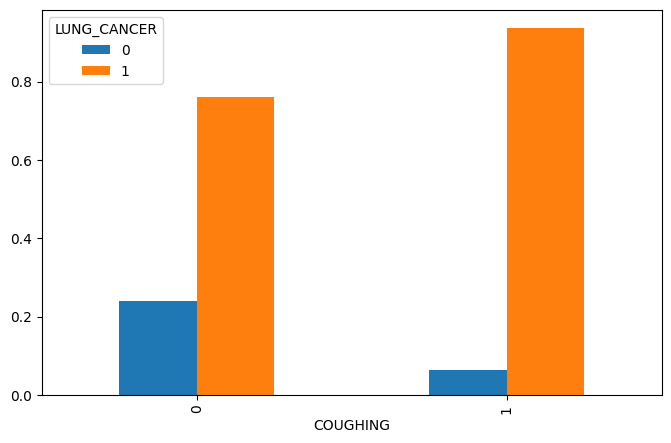

In [256]:
plot('COUGHING')

>**SHORTNESS OF BREATH**

<Axes: xlabel='SHORTNESS OF BREATH'>

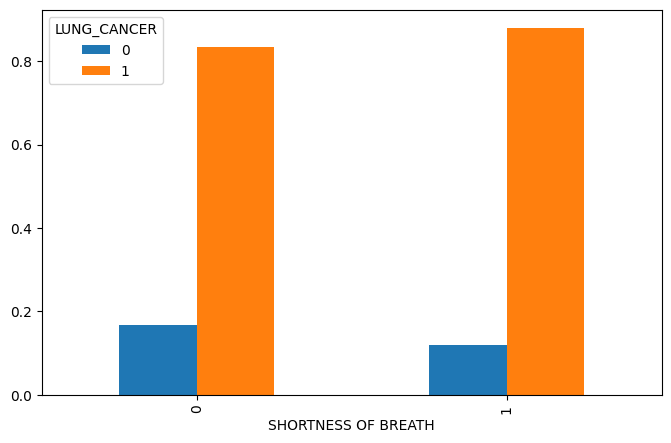

In [257]:
plot('SHORTNESS OF BREATH')

>**SWALLOWING DIFFICULTY**

<Axes: xlabel='SWALLOWING DIFFICULTY'>

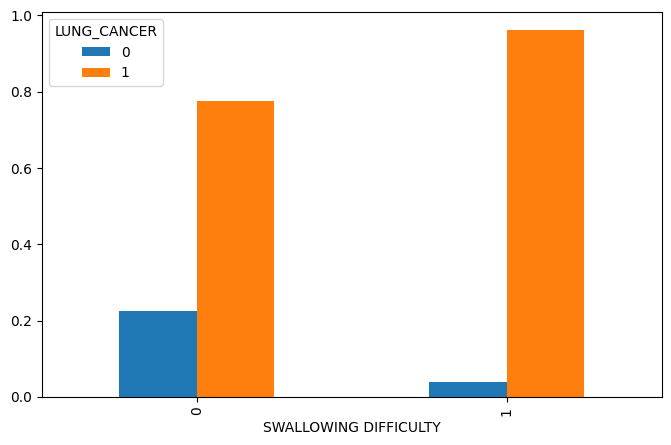

In [258]:
plot('SWALLOWING DIFFICULTY')

>**CHEST PAIN**

<Axes: xlabel='CHEST PAIN'>

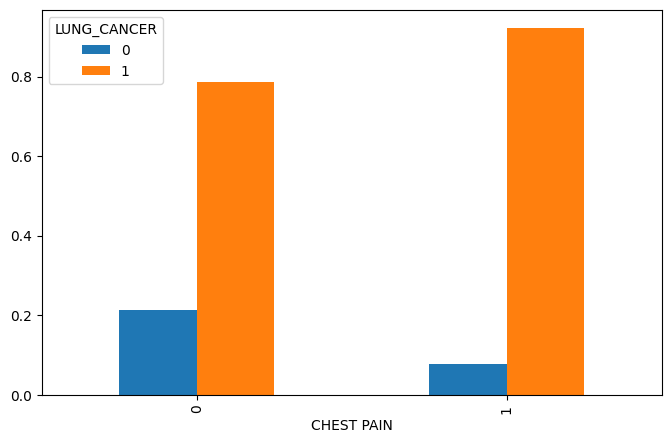

In [259]:
plot('CHEST PAIN')

## **EDA**

In [260]:
# Finding the Correlation
cn = df.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.020693,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.020693,1.000000,-0.066964,0.020675,0.040107,0.034378,0.006244,0.033227,0.054592,0.052721,0.043347,0.169601,0.001133,-0.006109,-0.042030,0.097235
SMOKING,0.041131,-0.066964,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.020675,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.040107,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.034378,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,0.006244,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.033227,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.054592,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.052721,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


>**HEATMAP**

<Axes: >

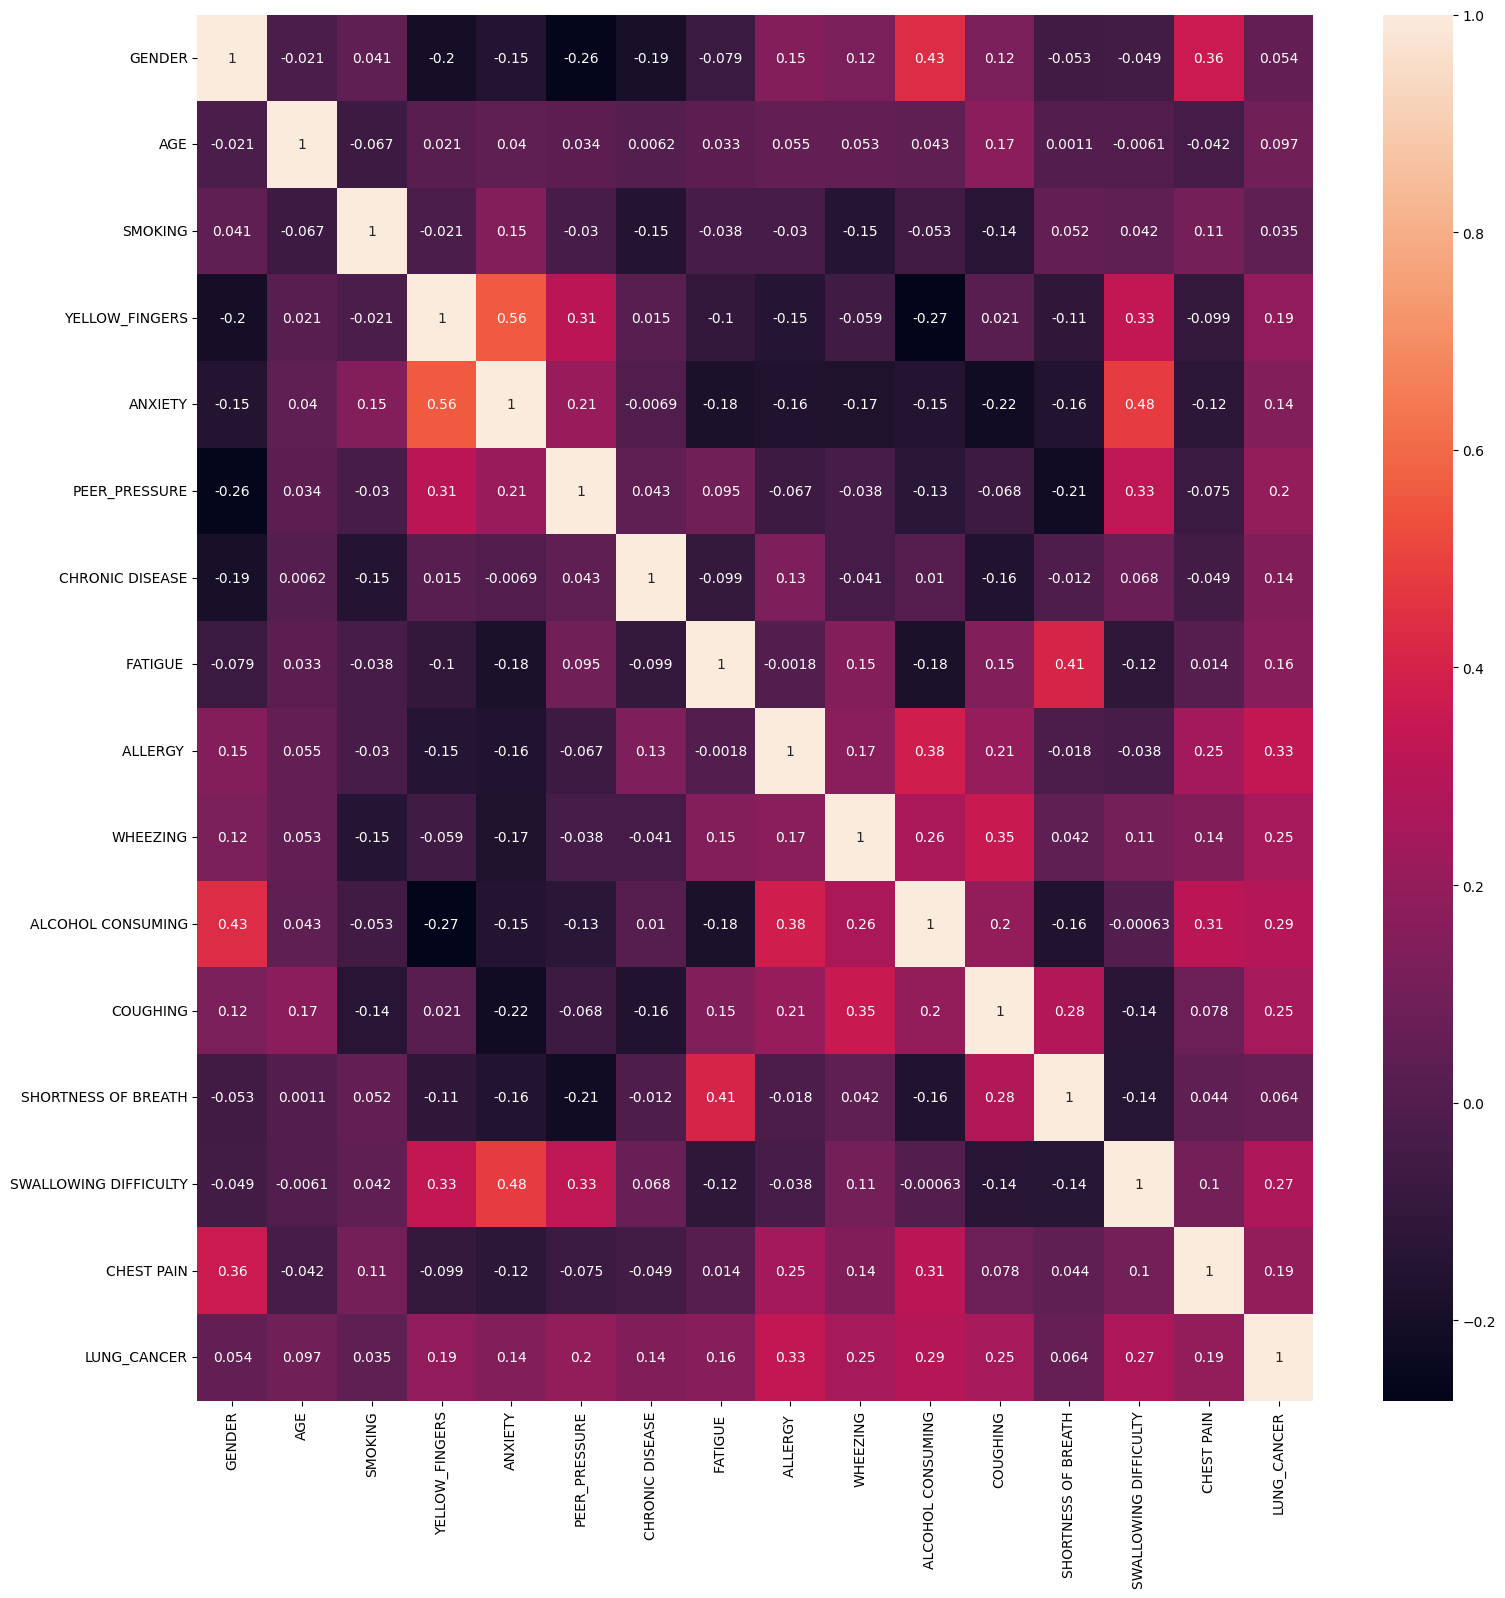

In [261]:
plt.subplots(figsize=(18,18))
sns.heatmap(cn,annot=True)

In [262]:
# Extract numerical features
numerical_features = []
for i in df.columns:
    if df[i].dtype != 'O':
        numerical_features.append(i)

>**HISTOGRAM**

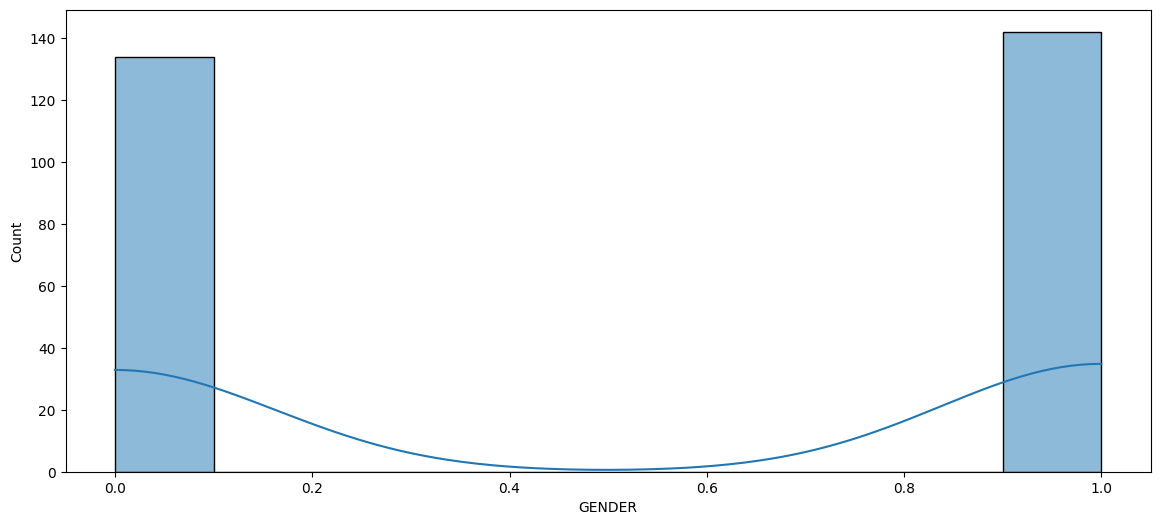

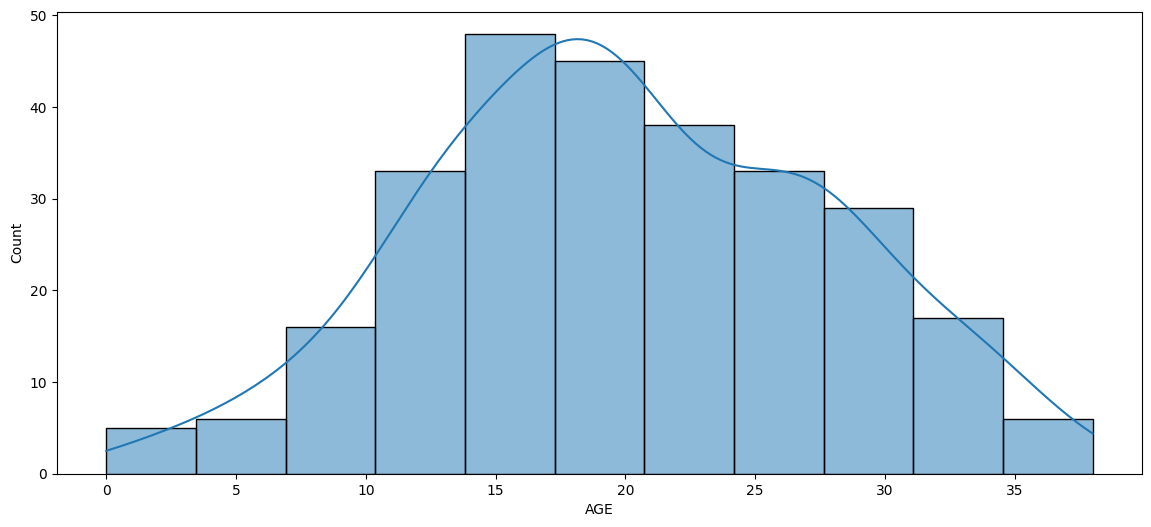

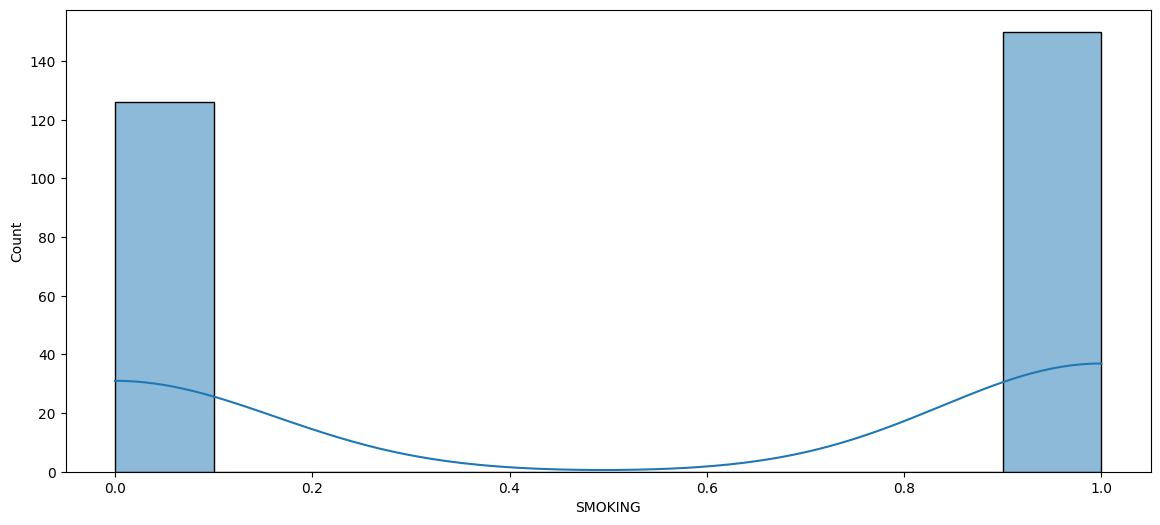

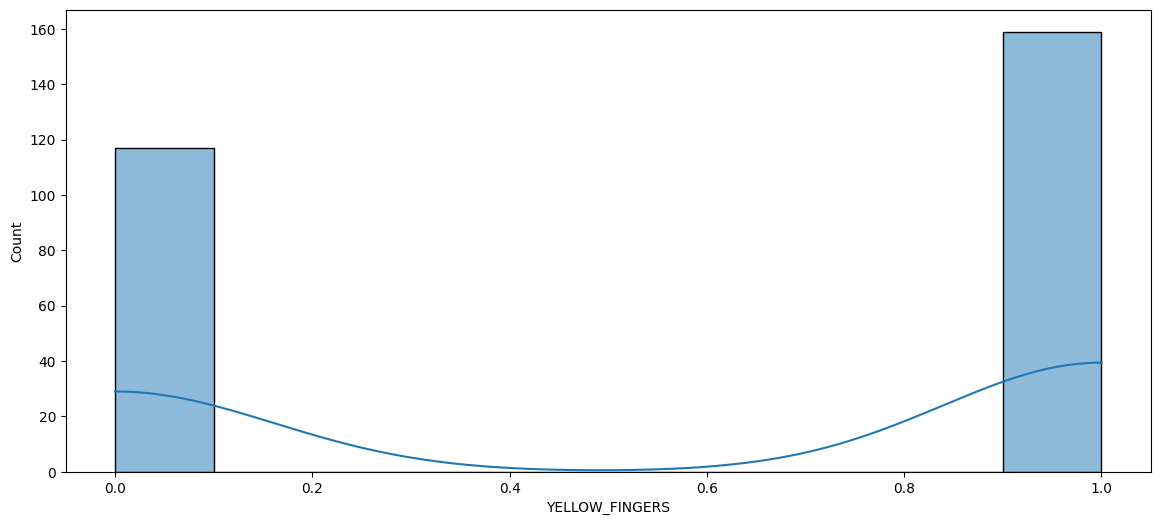

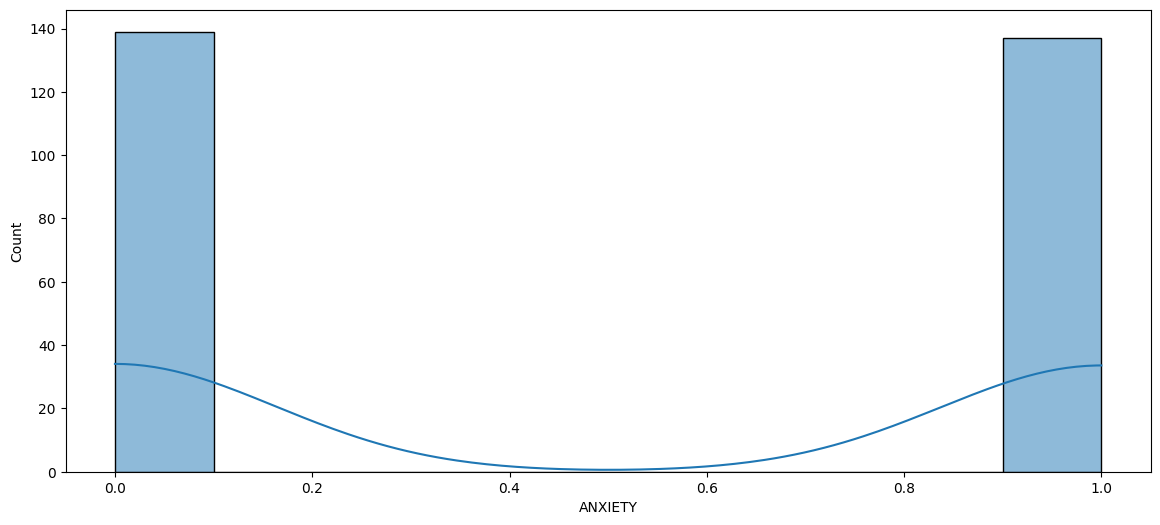

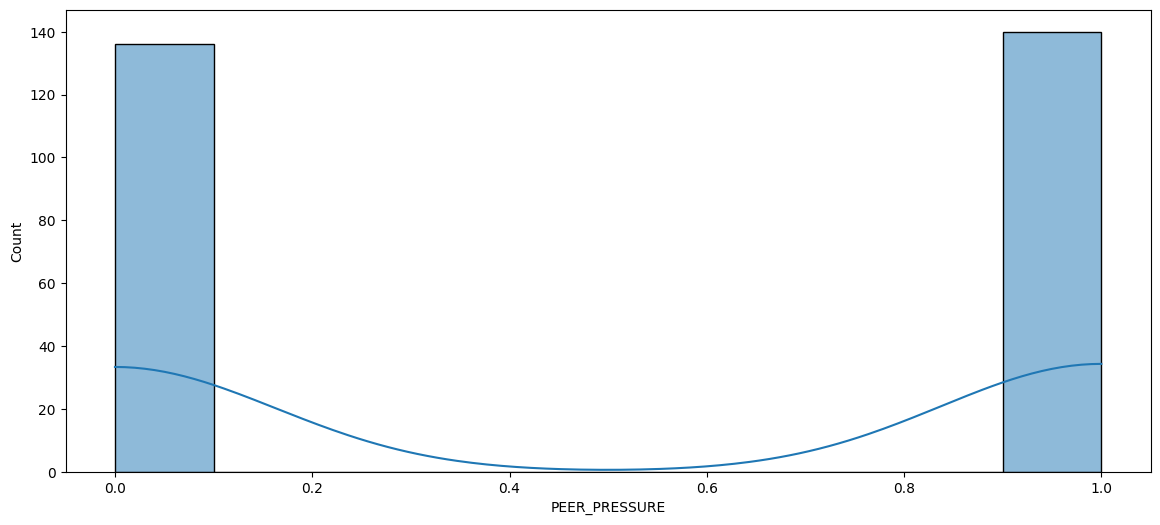

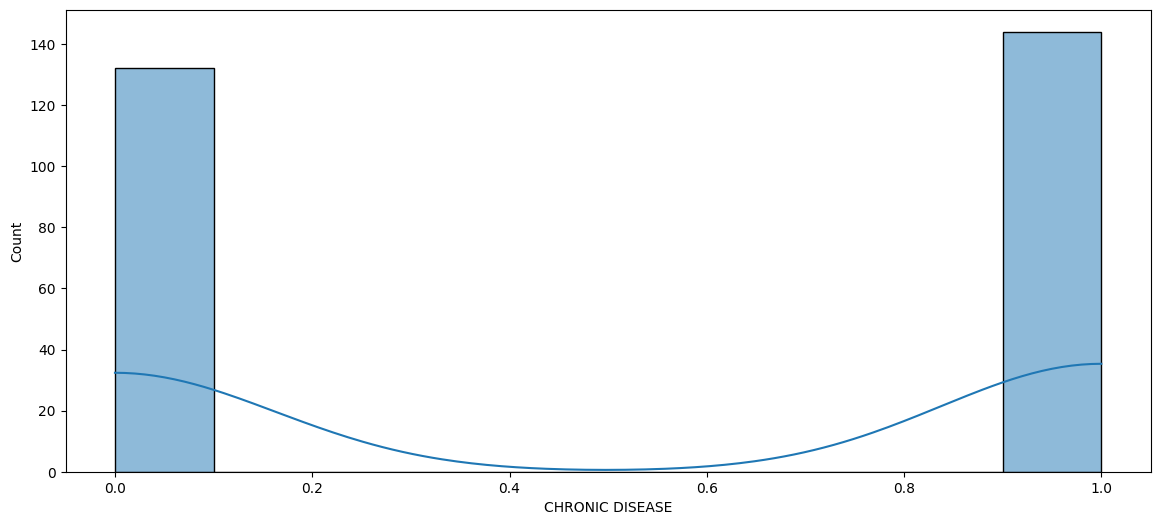

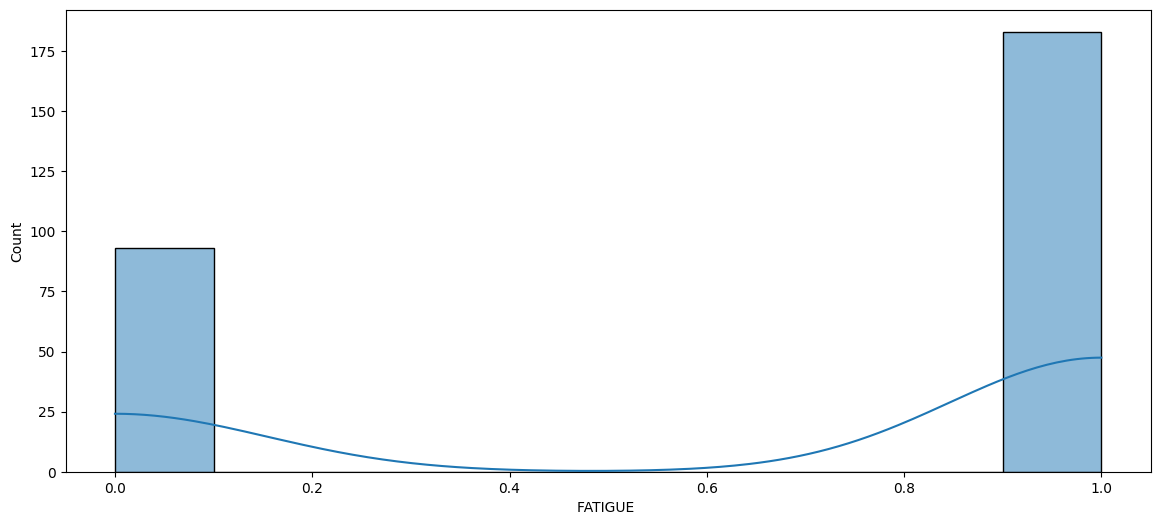

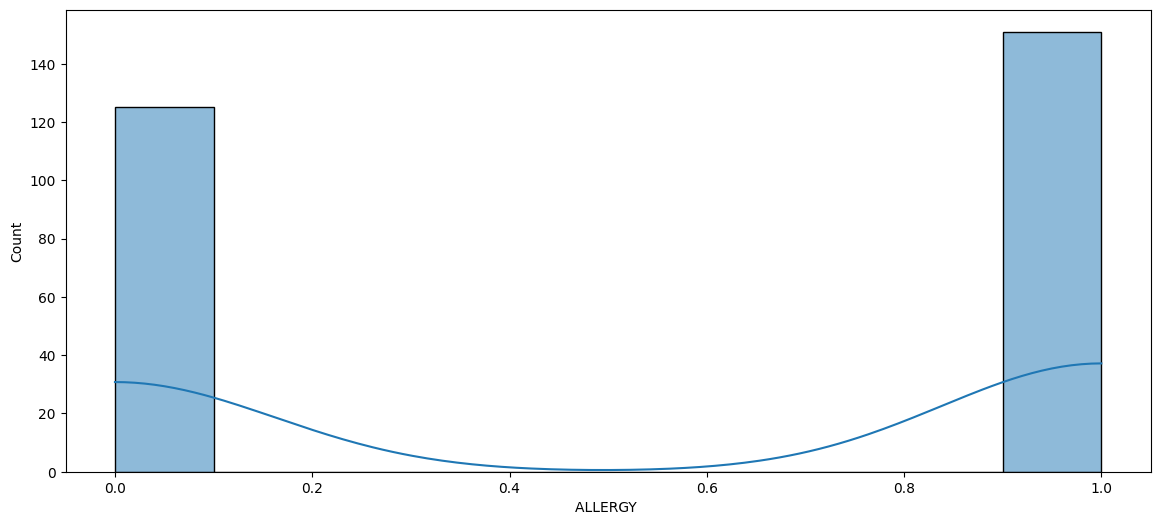

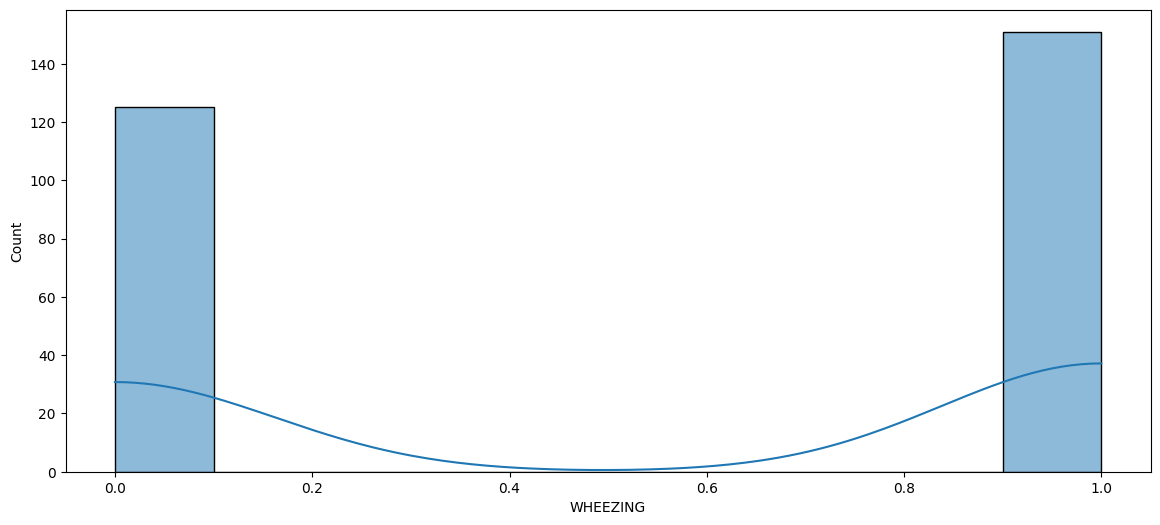

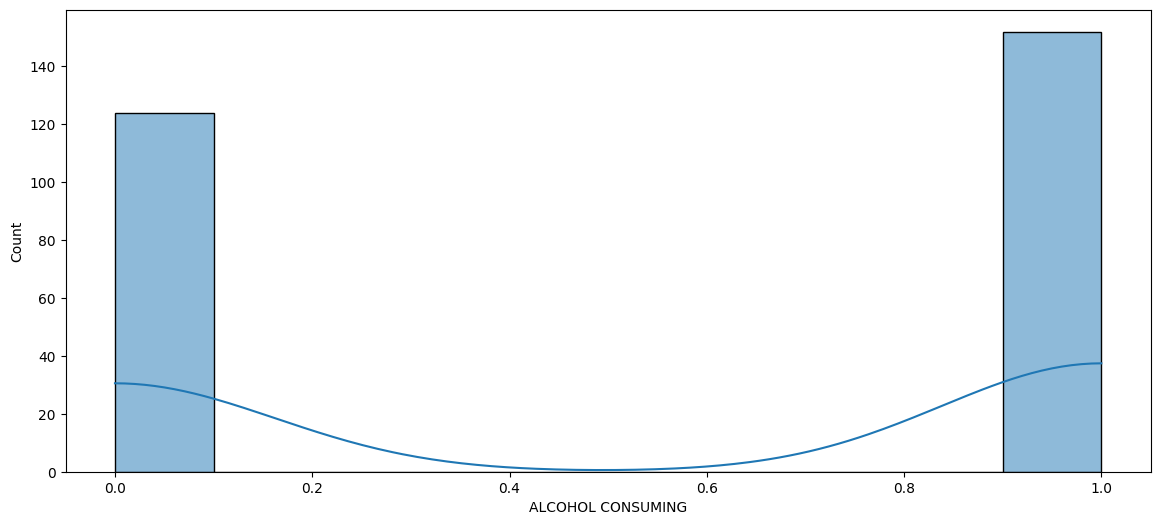

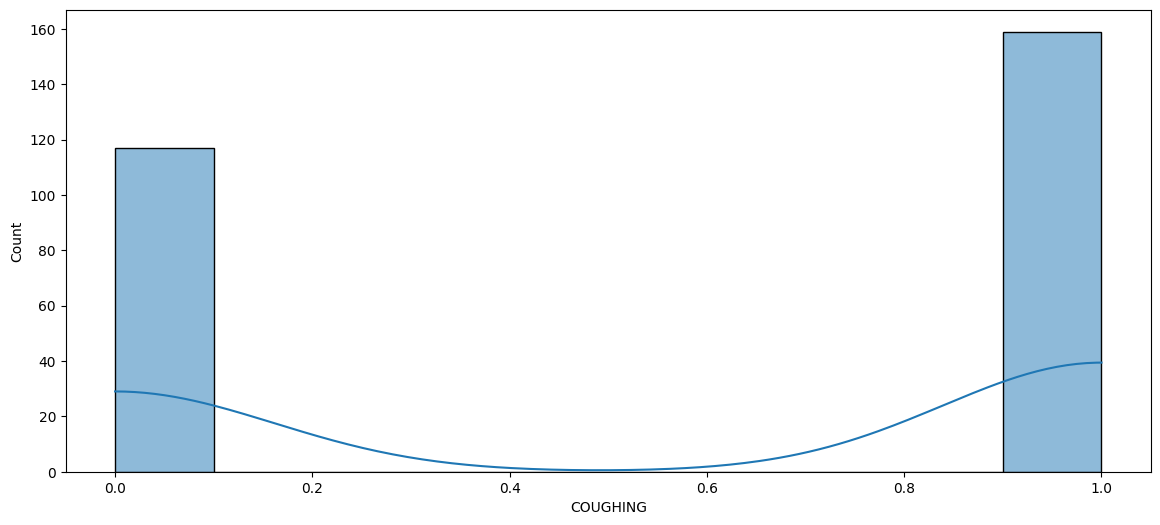

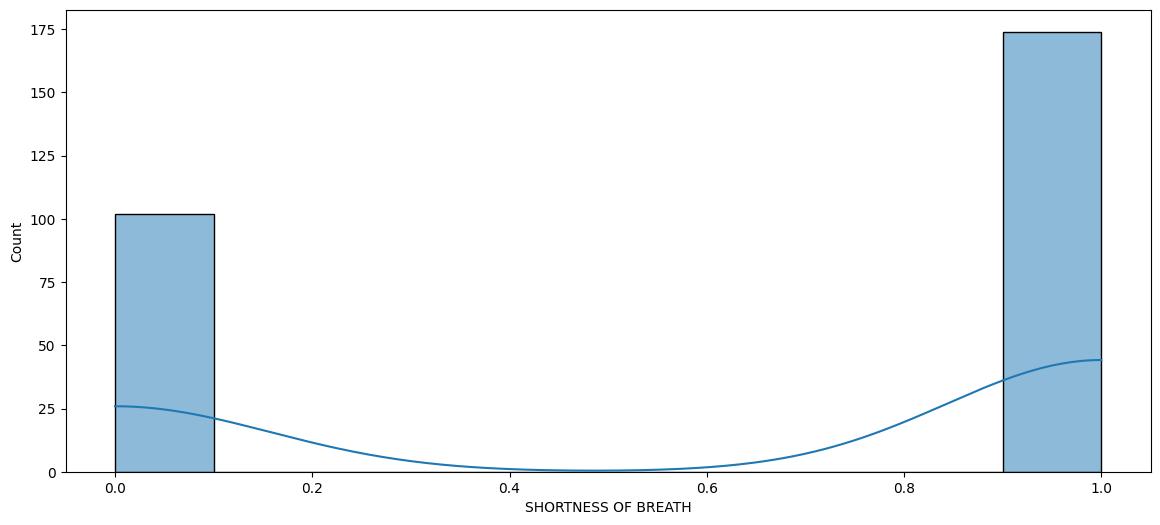

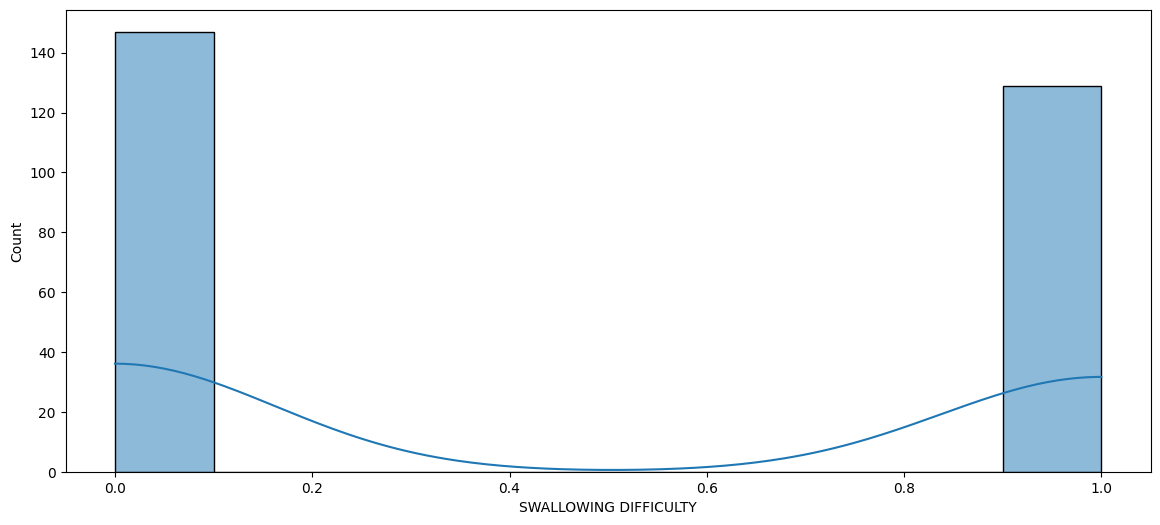

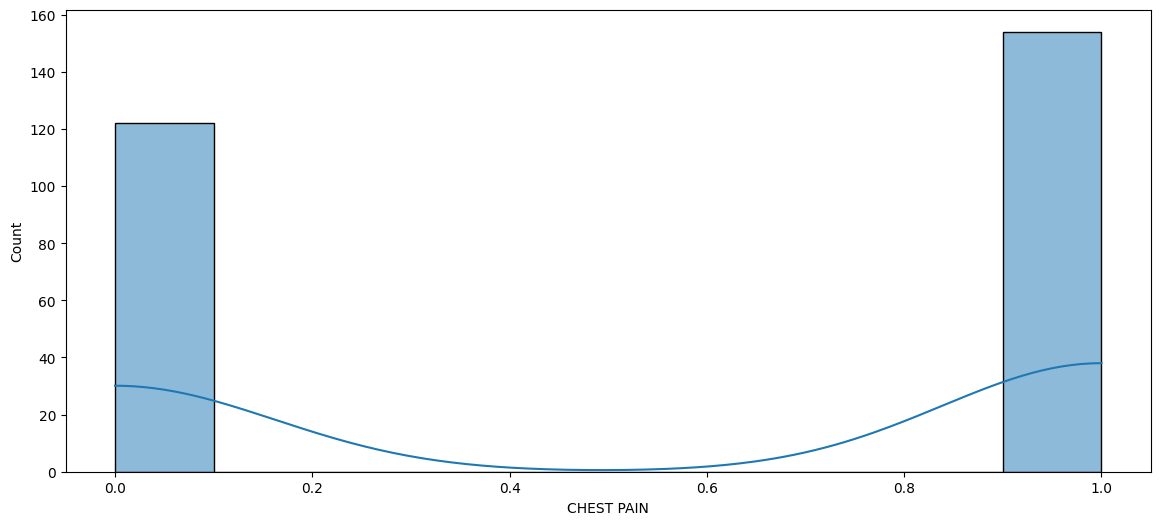

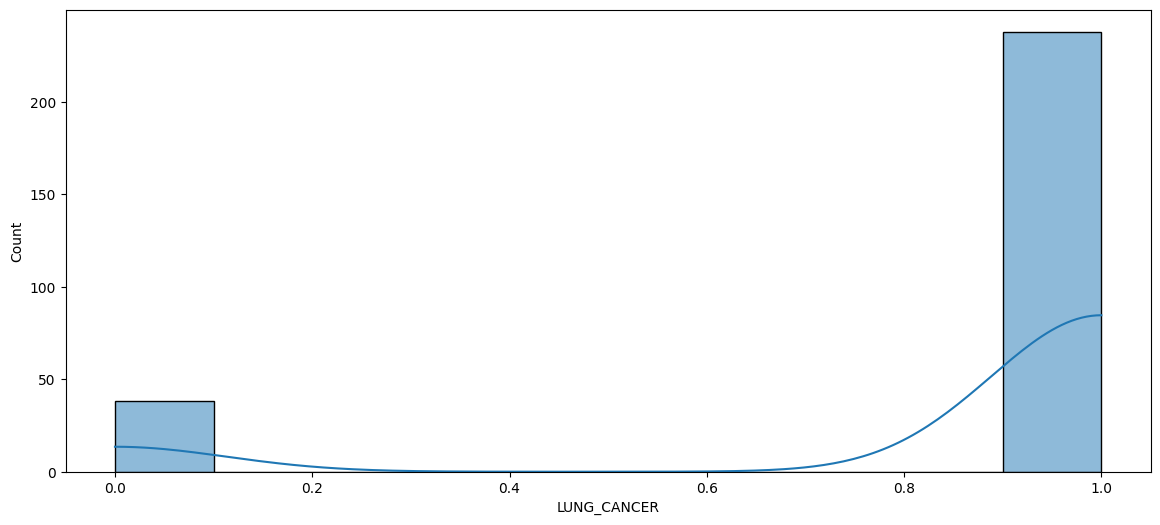

In [263]:

for i in numerical_features:
    plt.figure(figsize=(14,6))
    sns.histplot(df[i],kde=True)

## **TRAINING AND TEST DATA PREPARATION**

In [264]:
# Divide the Independent and Dependent Feature
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [265]:
# Transform the imbalanced dataset
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [266]:
oversample_df = pd.concat([X,y],axis=1)

In [267]:
oversample_df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0    238
Name: count, dtype: int64

In [268]:
# Divide into Training and Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [269]:
# Not Normalized / Standardized Data forr MultinomialNB
X_train_MNB = X_train
X_test_MNB = X_test
y_train_MNB = y_train
y_test_MNB = y_test

>**DATA NORMALIZATION**

In [270]:
# Standardize / Normalize the Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **MODEL TRAINING**

>**LOGISTIC REGRESSION**

In [271]:
# Logistic Regression
log_reg = LogisticRegression()

In [272]:
# Train
log_reg.fit(X_train,y_train)

LogisticRegression()

In [273]:
# Prediction
y_log_reg_pred = log_reg.predict(X_test)

In [274]:
# Model Accuracy
log_reg_report = classification_report(y_test,y_log_reg_pred)
print('The Report of the Logistic Regression\n',log_reg_report)

The Report of the Logistic Regression
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.95      0.93      0.94        45

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



In [275]:
# The model is almost 95% accurate.

>**DECISION TREE**

In [276]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [277]:
# Fit
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [278]:
# Predict Result
y_decision_tree_pred = decision_tree.predict(X_test)


In [279]:
# Model Accuracy
decision_tree_report = classification_report(y_test,y_decision_tree_pred)
print('The Report of the Decision Tree\n',classification_report(y_test,y_decision_tree_pred))

The Report of the Decision Tree
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.91      0.89      0.90        45

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.91      0.91      0.91        96



In [280]:
# The Model is about 90% accurate.

>**KNN**

In [281]:
# K Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors=5,algorithm='auto')

In [282]:
# Train
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [283]:
# Predict
y_knn_pred = knn_model.predict(X_test)

In [284]:
# Model Accuracy
knn_report = classification_report(y_test,y_knn_pred)
print('The Report of the KNN is\n',classification_report(y_test,y_knn_pred))

The Report of the KNN is
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.95      0.93      0.94        45

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



In [285]:
# The Model is 98% accurate

>**GAUSSIAN NAIVE BAYES**

In [286]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()

In [287]:
# Train the Model
gnb_model.fit(X_train,y_train)

GaussianNB()

In [288]:
# Predict the Model
y_gnb_pred = gnb_model.predict(X_test)

In [289]:
# Model Accuracy
gnb_report = classification_report(y_test,y_gnb_pred)
print('The Report of the Gaussian NB is\n',gnb_report)

The Report of the Gaussian NB is
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        51
           1       0.87      1.00      0.93        45

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.94      0.93      0.93        96



In [290]:
# The Model is 92% accurate

>**MULTINOMIAL NAIVE BAYES**

In [291]:
# Multinomial Naive Bayes
mnb_model = MultinomialNB()

In [292]:
# Fit the Model
mnb_model.fit(X_train_MNB,y_train_MNB)

MultinomialNB()

In [293]:
# Predict the Model
y_mnb_pred = mnb_model.predict(X_test_MNB)

In [294]:
# Model Accuracy
mnb_report = classification_report(y_test_MNB,y_mnb_pred)
print('The Report of the Multinomial NB is\n',mnb_report)

The Report of the Multinomial NB is
               precision    recall  f1-score   support

           0       0.98      0.86      0.92        51
           1       0.86      0.98      0.92        45

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



In [295]:
# The Model is 91% accurate

In [296]:
# Support Vector Machine
svc_model = SVC()

In [297]:
# Training the Model
svc_model.fit(X_train,y_train)

SVC()

In [298]:
# Predict the Model
y_svc_pred = svc_model.predict(X_test)

In [299]:
# Model Accuracy
svc_report = classification_report(y_test,y_svc_pred)
print('The Report of the Support Vector Machine is\n',svc_report)

The Report of the Support Vector Machine is
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.96      0.96      0.96        45

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



In [300]:
# The Model is 96% accurate

In [301]:
# XGBoost 
xgb_model = XGBClassifier()

In [302]:
# Train the dataset
xgb_model = xgb_model.fit(X_train,y_train)

In [303]:
# Predict the dataset
y_xgb_pred = xgb_model.predict(X_test)

In [304]:
# Model Accuracy
xgb_report = classification_report(y_test,y_xgb_pred)
print('The Report of the XG Boost NB is\n',xgb_report)

The Report of the XG Boost NB is
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.93      0.93      0.93        45

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



In [305]:
# The Model is 96% accurate

In [306]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

In [307]:
# Train the Model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [308]:
y_gb_pred= gb_model.predict(X_test) 

In [309]:
# Model Accuracy
gb_report = classification_report(y_test,y_gb_pred)
print('The Report of the XG Boost NB is\n',gb_report)

The Report of the XG Boost NB is
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.91      0.96      0.93        45

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



In [310]:
# The Model is 94% accurate

>**K FOLD CROSS VALIDATION**

In [311]:
# Let's perform K fold Cross Validation
k = 10
kf = KFold(n_splits=k,shuffle=True,random_state=42)
log_reg_score = cross_val_score(log_reg,X_train,y_train,cv=kf)

decision_tree_score = cross_val_score(decision_tree,X_train,y_train,cv=kf)

knn_model_score = cross_val_score(knn_model,X_train,y_train,cv=kf)

gnb_model_score = cross_val_score(gnb_model,X_train,y_train,cv=kf)

mnb_model_score = cross_val_score(mnb_model,X_train_MNB,y_train_MNB,cv=kf)

svc_model_score = cross_val_score(svc_model,X_train,y_train,cv=kf)

xgb_model_score = cross_val_score(xgb_model,X_train,y_train,cv=kf)

gb_model_score = cross_val_score(gb_model,X_train,y_train,cv=kf)

print("Logistic regression models' average accuracy:", np.mean(log_reg_score))
print("Decision tree models' average accuracy:", np.mean(decision_tree_score))
print("KNN models' average accuracy:", np.mean(knn_model_score))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_score))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_score))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_score))
print("XGBoost models' average accuracy:", np.mean(xgb_model_score))
print("Gradient boost models' average accuracy:", np.mean(gb_model_score))


Logistic regression models' average accuracy: 0.9552631578947368
Decision tree models' average accuracy: 0.9131578947368422
KNN models' average accuracy: 0.9552631578947368
Gaussian naive bayes models' average accuracy: 0.9105263157894736
Multinomial naive bayes models' average accuracy: 0.9105263157894736
Support Vector Classifier models' average accuracy: 0.9394736842105262
XGBoost models' average accuracy: 0.944736842105263
Gradient boost models' average accuracy: 0.9315789473684211


>**STRATIFIED K FOLD CROSS VALIDATION**

In [312]:
# Let's Perform Stratified Cross Validation
k = 10
kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=42)
log_reg_score = cross_val_score(log_reg,X_train,y_train,cv=kf)

decision_tree_score = cross_val_score(decision_tree,X_train,y_train,cv=kf)

knn_model_score = cross_val_score(knn_model,X_train,y_train,cv=kf)

gnb_model_score = cross_val_score(gnb_model,X_train,y_train,cv=kf)

mnb_model_score = cross_val_score(mnb_model,X_train_MNB,y_train_MNB,cv=kf)

svc_model_score = cross_val_score(svc_model,X_train,y_train,cv=kf)

xgb_model_score = cross_val_score(xgb_model,X_train,y_train,cv=kf)

gb_model_score = cross_val_score(gb_model,X_train,y_train,cv=kf)

print("Logistic regression models' average accuracy:", np.mean(log_reg_score))
print("Decision tree models' average accuracy:", np.mean(decision_tree_score))
print("KNN models' average accuracy:", np.mean(knn_model_score))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_score))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_score))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_score))
print("XGBoost models' average accuracy:", np.mean(xgb_model_score))
print("Gradient boost models' average accuracy:", np.mean(gb_model_score))


Logistic regression models' average accuracy: 0.9526315789473683
Decision tree models' average accuracy: 0.9394736842105262
KNN models' average accuracy: 0.9578947368421051
Gaussian naive bayes models' average accuracy: 0.9078947368421053
Multinomial naive bayes models' average accuracy: 0.9078947368421053
Support Vector Classifier models' average accuracy: 0.944736842105263
XGBoost models' average accuracy: 0.9394736842105262
Gradient boost models' average accuracy: 0.9447368421052632


## <center><b>HYPERPARAMETER TUNING<b></center>

**PARAMETER DEFINING**

>**LOGISTIC REGRESSION**

In [326]:
logistic_regression_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, logistic_regression_params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
model = grid_search.best_estimator_
print(f'The accuracy score of Logistic Regression is {accuracy * 100} %')


The accuracy score of Logistic Regression is 96.875 %


>**DECISION TREE**

In [314]:
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, decision_tree_params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of Decision Tree is {accuracy * 100} %')

The accuracy score of Decision Tree is 92.70833333333334 %


>**KNN**

In [315]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
decision_tree = ()
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of KNN is {accuracy * 100} %')


The accuracy score of KNN is 94.79166666666666 %


>**GAUSSIAN NAIVE BAYES**

In [316]:
gaussian_nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gaussian_nb = GaussianNB()
grid_search = GridSearchCV(gaussian_nb,gaussian_nb_params,cv=10,scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of Gaussian Naive Bayes is {accuracy * 100} %')


The accuracy score of Gaussian Naive Bayes is 92.70833333333334 %


>**MULTINOMIAL NAIVE BAYES**

In [317]:
multinomial_nb_params = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}
multinomial_nb = MultinomialNB()
grid_search = GridSearchCV(multinomial_nb,multinomial_nb_params,cv=10,scoring='accuracy')
grid_search.fit(X_train_MNB, y_train_MNB)
y_pred = grid_search.predict(X_test_MNB)
accuracy = accuracy_score(y_test_MNB,y_pred)
print(f'The accuracy score of Multinomial Naive Bayes is {accuracy * 100} %')

The accuracy score of Multinomial Naive Bayes is 91.66666666666666 %


>**SVC**

In [318]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svc = SVC()
grid_search = GridSearchCV(svc,svc_params,cv=10,scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of SVC is {accuracy * 100} %')

The accuracy score of SVC is 93.75 %


>**XGBOOST**

In [321]:
xgboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'gamma': [0, 1, 5]
}   
xgb_model = XGBClassifier()
grid_search = GridSearchCV(xgb_model,xgboost_params,cv=10,scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of XGBOOST is {accuracy * 100} %')

The accuracy score of XGBOOST is 94.79166666666666 %


>**GRADIENT BOOST**

In [322]:
gradient_boost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gradient_boost_model = GradientBoostingClassifier()
grid_search = GridSearchCV(gradient_boost_model,gradient_boost_params,cv=10,scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score of Gradient Boost is {accuracy * 100} %')

The accuracy score of Gradient Boost is 94.79166666666666 %


## **CONCLUSION**
*According to the Training Accuracy Logistic Regression is considered as the best suited model*

## **EXPORT MODEL**

In [327]:
file = open('D:\ML\LUNG CANCER PREDICTION\Model\lungCancerPredictionModel.pkl','wb')
pkl.dump(model,file)
file.close()